In [1]:
from IPython.display import HTML, display
import tabulate
import capabilities

spec = capabilities.LatticeSpecification('table_b.csv')

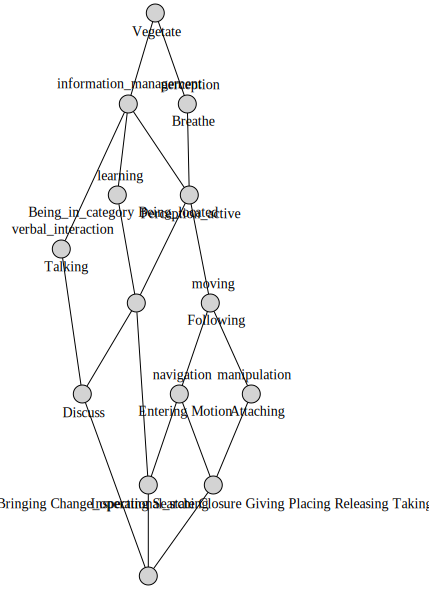

In [2]:
# visualize the Frame-capability lattice
spec.visualize()
# Going down means adding a required capability.
# Objects placed higher require less things, are more simple
# In order to find neighbors that only require a specified set of things (some capabilities are not available),
# the navigation should go up, considering all the objects in the path to the root
# that don't belong to the subtree with the missing capability.

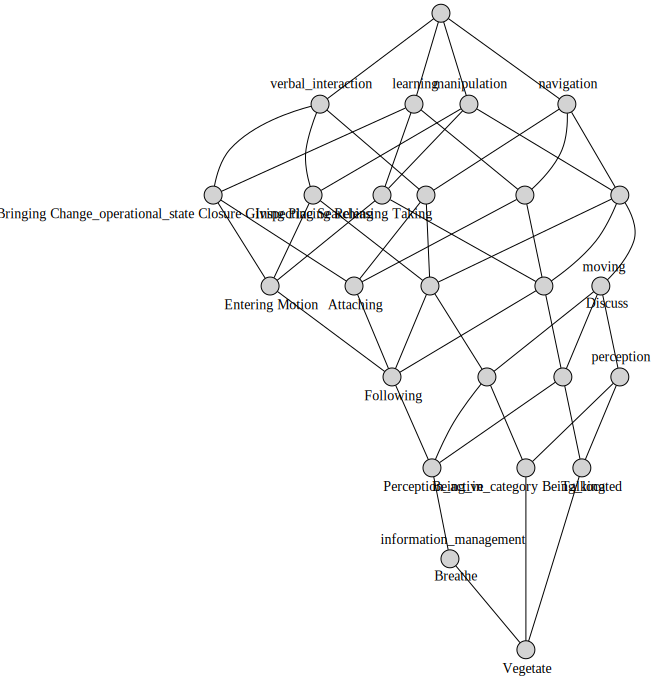

In [3]:
# visualize the Frame-incapability lattice
spec.visualize(inverse=True)
# going down means to remove requirements of capabilities.
# On the top there are the most complex actions.
# From a Frame request, it is possible to find the feasible Frames
# by meeting with the Concept identified by the capabilities that were required and are not available

In [4]:
recommender = spec.get_frame_recommender(['information_management', 'navigation', 'moving', 'perception', 'learning'])

In [5]:
recommender.can_fulfil('Bringing', verbose=True)
recommender.get_recommendation('Bringing', verbose=True)

requested: Bringing
	things required that cannot be provided:  ['manipulation']
	nearest ('Entering', 'Motion') between ('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')


In [6]:
headers = ['frame', 'fulfillable', 'missing_cap', 'recommended', 'possible']
lines = []
for frame in spec.frames:
    fulfillable = recommender.can_fulfil(frame)
    recommended = recommender.get_recommendation(frame)
    line = [frame, fulfillable, recommended.reason_missing, recommended.nearest, recommended.possible]
    lines.append(line)
display(HTML(tabulate.tabulate(lines, headers=headers, tablefmt='html')))

frame,fulfillable,missing_cap,recommended,possible
Attaching,False,['manipulation'],"('Following',)","('Following', 'Perception_active', 'Breathe', 'Vegetate')"
Being_in_category,True,[],"('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located', 'Vegetate')"
Being_located,True,[],"('Being_in_category', 'Being_located')","('Being_in_category', 'Being_located', 'Vegetate')"
Bringing,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Change_operational_state,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Closure,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Entering,True,[],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Following,True,[],"('Following',)","('Following', 'Perception_active', 'Breathe', 'Vegetate')"
Giving,False,['manipulation'],"('Entering', 'Motion')","('Entering', 'Following', 'Motion', 'Perception_active', 'Breathe', 'Vegetate')"
Inspecting,True,[],"('Inspecting', 'Searching')","('Being_in_category', 'Being_located', 'Entering', 'Following', 'Inspecting', 'Motion', 'Perception_active', 'Searching', 'Breathe', 'Vegetate')"
